<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment7/Assignment_7_NMT_Srinath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Assignment


1.   Srinath Mannam (229750)
2.   Meghana Rao (234907)
3.   Govind Shukla (235192)

# import statements

In [1]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 5.0 MB/s 


In [2]:
import os
import sys
import numpy as np
from datetime import datetime
import tensorflow as tf
import tensorflow.keras.preprocessing.sequence as sequence
import tensorflow_text as tf_text
import typing
from typing import Any, Tuple
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Change the directory

In [3]:
working_directory = '/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/07_Assignment'
def colabDrive():
    from google.colab import drive
    drive.mount("/content/drive")

    if os.getcwd() !=  working_directory:
      os.chdir(working_directory)
    print(os.getcwd())

In [4]:
colabDrive()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/07_Assignment


# Preamble

## Helper function which can be used to check the shapes

In [5]:
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    if isinstance(names, str):
      names = (names,)

    shape = tf.shape(tensor)
    rank = tf.rank(tensor)

    if rank != len(names):
      raise ValueError(f'Rank mismatch:\n'
                       f'    found {rank}: {shape.numpy()}\n'
                       f'    expected {len(names)}: {names}\n')

    for i, name in enumerate(names):
      if isinstance(name, int):
        old_dim = name
      else:
        old_dim = self.shapes.get(name, None)
      new_dim = shape[i]

      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

## A function that will read the data and return

In [6]:
def load_data(path):
  # text = path.read_text(encoding='utf-8')
  with open("tel-eng/tel.txt", "r", encoding='utf-8') as tel:
     telugu=tel.read()

  lines = telugu.splitlines()
  pairs = [line.split('\t')[:-1] for line in lines]

  inp = [inp for targ, inp in pairs]
  targ = [targ for targ, inp in pairs]

  return targ, inp

In [7]:
targ, inp = load_data("tel-eng/tel.txt")

In [8]:
print(inp[-1])
print(targ[-1])

టామ్ తనకు తాను చేయటానికి అనుమతించకపోవచ్చని అనుకున్నాడు.
Tom thought he might not be permitted to do that by himself.


## Create dataset

In [9]:
BUFFER_SIZE = len(inp)
BATCH_SIZE = 60

dataset = tf.data.Dataset.from_tensor_slices((inp, targ)).shuffle(BUFFER_SIZE)

test_dataset = dataset.take(20) 
train_dataset = dataset.skip(20)

train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(20).shuffle(10, seed=45)

In [10]:
for example_input_batch, example_target_batch in train_dataset.take(1):
  print(example_input_batch[:5])
  print()
  print(example_target_batch[:5])
  break

tf.Tensor(
[b'\xe0\xb0\x85\xe0\xb0\xa6\xe0\xb0\xbf \xe0\xb0\x85\xe0\xb0\x82\xe0\xb0\xa4 \xe0\xb0\xa4\xe0\xb1\x87\xe0\xb0\xb2\xe0\xb0\xbf\xe0\xb0\x95 \xe0\xb0\x95\xe0\xb0\xbe\xe0\xb0\xa6\xe0\xb1\x81, \xe0\xb0\xa4\xe0\xb1\x86\xe0\xb0\xb2\xe0\xb1\x81\xe0\xb0\xb8\xe0\xb0\xbe'
 b'\xe0\xb0\xa8\xe0\xb1\x81\xe0\xb0\xb5\xe0\xb1\x8d\xe0\xb0\xb5\xe0\xb1\x81 \xe0\xb0\x97\xe0\xb0\x9f\xe0\xb1\x8d\xe0\xb0\x9f\xe0\xb0\xbf\xe0\xb0\x97\xe0\xb0\xbe \xe0\xb0\xae\xe0\xb0\xbe\xe0\xb0\x9f\xe0\xb1\x8d\xe0\xb0\xb2\xe0\xb0\xbe\xe0\xb0\xa1\xe0\xb0\xbe\xe0\xb0\xb2\xe0\xb0\xbf'
 b'\xe0\xb0\x9f\xe0\xb0\xbe\xe0\xb0\xae\xe0\xb1\x8d \xe0\xb0\xae\xe0\xb0\xb0\xe0\xb0\xbf\xe0\xb0\xaf\xe0\xb1\x81 \xe0\xb0\xa8\xe0\xb1\x87\xe0\xb0\xa8\xe0\xb1\x81 \xe0\xb0\xa4\xe0\xb0\xb0\xe0\xb0\x9a\xe0\xb1\x81\xe0\xb0\x97\xe0\xb0\xbe \xe0\xb0\xac\xe0\xb0\xb8\xe0\xb1\x8d\xe0\xb0\xb8\xe0\xb1\x81\xe0\xb0\xb2\xe0\xb1\x8b \xe0\xb0\xae\xe0\xb1\x81\xe0\xb0\x9a\xe0\xb1\x8d\xe0\xb0\x9a\xe0\xb0\x9f\xe0\xb0\xbf\xe0\xb0\xb8\xe0\xb1\x8d\xe0\xb0\xa4\xe0

## Unicode Normalization

In [11]:
def tf_lower_and_split_punct(text):
  # Split accecented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, ఀ-౿(telugu text) and select punctuation.
  text = tf.strings.regex_replace(text, '[^ a-z$ఀ-౿.?!,¿]', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text

## Text Vectorization

Creating a word to index dictionary and an index to word dictionary for all unique source and target words in the dataset.

### For Telugu language

In [12]:
max_vocab_size = 5000

input_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

input_text_processor.adapt(inp)

# Here are the first 10 words from the vocabulary:
input_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '?', '.', 'నువ్వు', 'నేను', 'అది', 'నాకు']

### For English language

In [13]:
output_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size)

output_text_processor.adapt(targ)
output_text_processor.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'you', '?', 'to', 'i', 'the']

### See some tokens

In [14]:
example_inp_tokens = input_text_processor('నువ్వు అది చూసావా?')
example_inp_tokens

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([  2,   6,   8, 311,   4,   3])>

In [15]:
example_tar_tokens = output_text_processor('Can you see that?')
example_tar_tokens

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  2,  30,   5, 199,  10,   6,   3])>

## Constants

In [16]:
embedding_dim = 256
units = 1024

# Encoder

In [17]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, input_vocab_size, embedding_dim, enc_units):
    super(Encoder, self).__init__()
    self.enc_units = enc_units
    self.input_vocab_size = input_vocab_size

    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.input_vocab_size,
                                               embedding_dim)

    # The GRU RNN layer processes those vectors sequentially.
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   # Return the sequence and state
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, tokens, state=None):
    shape_checker = ShapeChecker()
    shape_checker(tokens, ('batch', 's'))

    # 2. The embedding layer looks up the embedding for each token.
    vectors = self.embedding(tokens)
    shape_checker(vectors, ('batch', 's', 'embed_dim'))

    # 3. The GRU processes the embedding sequence.
    #    output shape: (batch, s, enc_units)
    #    state shape: (batch, enc_units)
    output, state = self.gru(vectors, initial_state=state)
    shape_checker(output, ('batch', 's', 'enc_units'))
    shape_checker(state, ('batch', 'enc_units'))

    # 4. Returns the new sequence and its state.
    return output, state

In [18]:
# Convert the input text to tokens.
example_tokens = input_text_processor(example_input_batch)

# Encode the input sequence.
encoder = Encoder(input_text_processor.vocabulary_size(),
                  embedding_dim, units)
example_enc_output, example_enc_state = encoder(example_tokens)

print(f'Input batch, shape (batch): {example_input_batch.shape}')
print(f'Input batch tokens, shape (batch, s): {example_tokens.shape}')
print(f'Encoder output, shape (batch, s, units): {example_enc_output.shape}')
print(f'Encoder state, shape (batch, units): {example_enc_state.shape}')

Input batch, shape (batch): (60,)
Input batch tokens, shape (batch, s): (60, 10)
Encoder output, shape (batch, s, units): (60, 10, 1024)
Encoder state, shape (batch, units): (60, 1024)


# Attention Layers

## Bahdanau Attention

In [19]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super().__init__()
    # For Eqn. (4), the  Bahdanau attention
    self.W1 = tf.keras.layers.Dense(units, use_bias=False)
    self.W2 = tf.keras.layers.Dense(units, use_bias=False)

    self.attention = tf.keras.layers.AdditiveAttention()

  def call(self, query, value, mask):
    shape_checker = ShapeChecker()
    shape_checker(query, ('batch', 't', 'query_units'))
    shape_checker(value, ('batch', 's', 'value_units'))
    shape_checker(mask, ('batch', 's'))

    # From Eqn. (4), `W1@ht`.
    w1_query = self.W1(query)
    shape_checker(w1_query, ('batch', 't', 'attn_units'))

    # From Eqn. (4), `W2@hs`.
    w2_key = self.W2(value)
    shape_checker(w2_key, ('batch', 's', 'attn_units'))

    query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
    value_mask = mask

    context_vector, attention_weights = self.attention(
        inputs = [w1_query, value, w2_key],
        mask=[query_mask, value_mask],
        return_attention_scores = True,
    )
    shape_checker(context_vector, ('batch', 't', 'value_units'))
    shape_checker(attention_weights, ('batch', 't', 's'))

    return context_vector, attention_weights

In [20]:
attention_layer = BahdanauAttention(units)

In [21]:
# Later, the decoder will generate this attention query
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

# Attend to the encoded tokens

context_vector, attention_weights = attention_layer(
    query=example_attention_query,
    value=example_enc_output,
    mask=(example_tokens != 0))

print(f'Attention result shape: (batch_size, query_seq_length, units):           {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units):           (60, 2, 1024)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (60, 2, 10)


## Luong Attention

In [22]:
class LuongAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super().__init__()
    # For Eqn. (4), the  Luong attention
    self.W = tf.keras.layers.Dense(units, use_bias=False)

    self.attention = tf.keras.layers.Attention()

  def call(self, query, value, mask):
    shape_checker = ShapeChecker()
    shape_checker(query, ('batch', 't', 'query_units'))
    shape_checker(value, ('batch', 's', 'value_units'))
    shape_checker(mask, ('batch', 's'))

    # # From Eqn. (4), `W@ht`.
    w_query = self.W(query)
    shape_checker(w_query, ('batch', 't', 'attn_units'))

    query_mask = tf.ones(tf.shape(query)[:-1], dtype=bool)
    value_mask = mask

    context_vector, attention_weights = self.attention(
        inputs = [w_query, value],
        mask=[query_mask, value_mask],
        return_attention_scores = True,
    )
    shape_checker(context_vector, ('batch', 't', 'value_units'))
    shape_checker(attention_weights, ('batch', 't', 's'))

    return context_vector, attention_weights

In [23]:
luongattention_layer = LuongAttention(units)

In [24]:
# Later, the decoder will generate this attention query
example_attention_query = tf.random.normal(shape=[len(example_tokens), 2, 10])

# Attend to the encoded tokens

context_vector, attention_weights = luongattention_layer(
    query=example_attention_query,
    value=example_enc_output,
    mask=(example_tokens != 0))

print(f'Attention result shape: (batch_size, query_seq_length, units):           {context_vector.shape}')
print(f'Attention weights shape: (batch_size, query_seq_length, value_seq_length): {attention_weights.shape}')

Attention result shape: (batch_size, query_seq_length, units):           (60, 2, 1024)
Attention weights shape: (batch_size, query_seq_length, value_seq_length): (60, 2, 10)


# Decoder

In [25]:
class DecoderInput(typing.NamedTuple):
  new_tokens: Any
  enc_output: Any
  mask: Any

class DecoderOutput(typing.NamedTuple):
  logits: Any
  attention_weights: Any

In [26]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, output_vocab_size, embedding_dim, dec_units, att_Layer='B'):
    super(Decoder, self).__init__()
    self.dec_units = dec_units
    self.output_vocab_size = output_vocab_size
    self.embedding_dim = embedding_dim

    # For Step 1. The embedding layer convets token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.output_vocab_size,
                                               embedding_dim)

    # For Step 2. The RNN keeps track of what's been generated so far.
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # For step 3. The RNN output will be the query for the attention layer.
    if att_Layer == 'B':
      self.attention = BahdanauAttention(self.dec_units)
    elif att_Layer == 'L':
      self.attention = LuongAttention(self.dec_units)
    # For step 4. Eqn. (3): converting `ct` to `at`
    self.Wc = tf.keras.layers.Dense(dec_units, activation=tf.math.tanh,
                                    use_bias=False)

    # For step 5. This fully connected layer produces the logits for each
    # output token.
    self.fc = tf.keras.layers.Dense(self.output_vocab_size)

  def call(self,
         inputs: DecoderInput,
         state=None) -> Tuple[DecoderOutput, tf.Tensor]:
    shape_checker = ShapeChecker()
    shape_checker(inputs.new_tokens, ('batch', 't'))
    shape_checker(inputs.enc_output, ('batch', 's', 'enc_units'))
    shape_checker(inputs.mask, ('batch', 's'))

    if state is not None:
      shape_checker(state, ('batch', 'dec_units'))

    # Step 1. Lookup the embeddings
    vectors = self.embedding(inputs.new_tokens)
    shape_checker(vectors, ('batch', 't', 'embedding_dim'))

    # Step 2. Process one step with the RNN
    rnn_output, state = self.gru(vectors, initial_state=state)

    shape_checker(rnn_output, ('batch', 't', 'dec_units'))
    shape_checker(state, ('batch', 'dec_units'))

    # Step 3. Use the RNN output as the query for the attention over the
    # encoder output.
    context_vector, attention_weights = self.attention(
        query=rnn_output, value=inputs.enc_output, mask=inputs.mask)
    shape_checker(context_vector, ('batch', 't', 'dec_units'))
    shape_checker(attention_weights, ('batch', 't', 's'))

    # Step 4. Eqn. (3): Join the context_vector and rnn_output
    #     [ct; ht] shape: (batch t, value_units + query_units)
    context_and_rnn_output = tf.concat([context_vector, rnn_output], axis=-1)

    # Step 4. Eqn. (3): `at = tanh(Wc@[ct; ht])`
    attention_vector = self.Wc(context_and_rnn_output)
    shape_checker(attention_vector, ('batch', 't', 'dec_units'))

    # Step 5. Generate logit predictions:
    logits = self.fc(attention_vector)
    shape_checker(logits, ('batch', 't', 'output_vocab_size'))

    return DecoderOutput(logits, attention_weights), state

In [27]:
decoder = Decoder(output_text_processor.vocabulary_size(),
                  embedding_dim, units)

# Training

## Loss function

Summary:


*   Sparse Categorical crossentropy is the loss function
*   Not computing the loss where padding is applied



In [28]:
class MaskedLoss(tf.keras.losses.Loss):
  def __init__(self):
    self.name = 'masked_loss'
    self.loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')

  def __call__(self, y_true, y_pred):
    shape_checker = ShapeChecker()
    shape_checker(y_true, ('batch', 't'))
    shape_checker(y_pred, ('batch', 't', 'logits'))

    # Calculate the loss for each item in the batch.
    loss = self.loss(y_true, y_pred)
    shape_checker(loss, ('batch', 't'))

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, tf.float32)
    shape_checker(mask, ('batch', 't'))
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)

## Train Model

Summary


1.   A constructor which will initialise Encoder, Decoder etc
2.   A **train_step** function which will choose which function to run whether the train step function which is wrapped with tf or the normal train step function.
3.   A  **_preprocess** function which will preprocess the data.
4.   A  **_train_step** function.
5.   A  **_tf_train_step** function wrapped like a tf function.
6.   A  **_loop_step** function.



In [29]:
class TrainTranslator(tf.keras.Model):
  ## --------------------------------------------------Start of the Constructor----------------------------------------------------------
  def __init__(self, embedding_dim, units,
               input_text_processor,
               output_text_processor, 
               use_tf_function=True,
               att_Layer='B'):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(input_text_processor.vocabulary_size(),
                      embedding_dim, units)
    decoder = Decoder(output_text_processor.vocabulary_size(),
                      embedding_dim, units, att_Layer)

    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor
    self.use_tf_function = use_tf_function
    self.shape_checker = ShapeChecker()
  ## --------------------------------------------------End of the Constructor----------------------------------------------------------

  ## --------------------------------------------------Start of the train step----------------------------------------------------------
  #Choose which train step to run
  def train_step(self, inputs):
    self.shape_checker = ShapeChecker()
    if self.use_tf_function:
      return self._tf_train_step(inputs)
    else:
      return self._train_step(inputs)
  ## --------------------------------------------------End of the train step----------------------------------------------------------

  ## --------------------------------------------------Start of the Preprocess data function----------------------------------------------------------
  def _preprocess(self, input_text, target_text):
    self.shape_checker(input_text, ('batch',))
    self.shape_checker(target_text, ('batch',))

    # Convert the text to token IDs
    input_tokens = self.input_text_processor(input_text)
    target_tokens = self.output_text_processor(target_text)
    self.shape_checker(input_tokens, ('batch', 's'))
    self.shape_checker(target_tokens, ('batch', 't'))

    # Convert IDs to masks.
    input_mask = input_tokens != 0
    self.shape_checker(input_mask, ('batch', 's'))

    target_mask = target_tokens != 0
    self.shape_checker(target_mask, ('batch', 't'))

    return input_tokens, input_mask, target_tokens, target_mask
  ## --------------------------------------------------End of the Preprocess data function----------------------------------------------------------

  ## --------------------------------------------------Start of the train step function definition----------------------------------------------------------
  def _train_step(self, inputs):
    input_text, target_text = inputs  

    (input_tokens, input_mask,
    target_tokens, target_mask) = self._preprocess(input_text, target_text)

    max_target_length = tf.shape(target_tokens)[1]
    

    with tf.GradientTape() as tape:
      # Encode the input
      enc_output, enc_state = self.encoder(input_tokens)
      self.shape_checker(enc_output, ('batch', 's', 'enc_units'))
      self.shape_checker(enc_state, ('batch', 'enc_units'))

      # Initialize the decoder's state to the encoder's final state.
      # This only works if the encoder and decoder have the same number of
      # units.
      dec_state = enc_state
      loss = tf.constant(0.0)

      for t in tf.range(max_target_length-1):
        # Pass in two tokens from the target sequence:
        # 1. The current input to the decoder.
        # 2. The target for the decoder's next prediction.
        new_tokens = target_tokens[:, t:t+2]
        step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                              enc_output, dec_state)
        loss = loss + step_loss

      # Average the loss over all non padding tokens.
      average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))


    # Apply an optimization step
    variables = self.trainable_variables 
    gradients = tape.gradient(average_loss, variables)
    self.optimizer.apply_gradients(zip(gradients, variables))

    # Return a dict mapping metric names to current value
    return {'batch_loss': average_loss}
  ## --------------------------------------------------End of the train step function definition----------------------------------------------------------


  ## --------------------------------------------------Start of the test step evaluate function definition----------------------------------------------------------
  @tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
  def _test_step(self, inputs):
    input_text, target_text = inputs  
    
    (input_tokens, input_mask,
    target_tokens, target_mask) = self._preprocess(input_text, target_text)

    max_target_length = tf.shape(target_tokens)[1]
    
    # Encode the input
    enc_output, enc_state = self.encoder(input_tokens)
    self.shape_checker(enc_output, ('batch', 's', 'enc_units'))
    self.shape_checker(enc_state, ('batch', 'enc_units'))

    # Initialize the decoder's state to the encoder's final state.
    # This only works if the encoder and decoder have the same number of
    # units.
    dec_state = enc_state
    loss = tf.constant(0.0)

    for t in tf.range(max_target_length-1):
      # Pass in two tokens from the target sequence:
      # 1. The current input to the decoder.
      # 2. The target for the decoder's next prediction.
      new_tokens = target_tokens[:, t:t+2]
      step_loss, dec_state = self._loop_step(new_tokens, input_mask,
                                            enc_output, dec_state)
      loss = loss + step_loss

    # Average the loss over all non padding tokens.
    average_loss = loss / tf.reduce_sum(tf.cast(target_mask, tf.float32))

    # Return a dict mapping metric names to current value
    return {'batch_loss': average_loss}
  ## --------------------------------------------------End of the test step evaluate function definition----------------------------------------------------------

  ## --------------------------------------------------Start of the tf train step function ----------------------------------------------------------
  # wrap train step into tf function to speed up the process
  @tf.function(input_signature=[[tf.TensorSpec(dtype=tf.string, shape=[None]),
                               tf.TensorSpec(dtype=tf.string, shape=[None])]])
  def _tf_train_step(self, inputs):
    return self._train_step(inputs)
  ## --------------------------------------------------Start of the tf train step function ----------------------------------------------------------


  ## --------------------------------------------------Start of the train loop function----------------------------------------------------------
  #The _loop_step method, added below, executes the decoder and calculates the incremental loss and new decoder state (dec_state).
  def _loop_step(self, new_tokens, input_mask, enc_output, dec_state):
    input_token, target_token = new_tokens[:, 0:1], new_tokens[:, 1:2]

    # Run the decoder one step.
    decoder_input = DecoderInput(new_tokens=input_token,
                                enc_output=enc_output,
                                mask=input_mask)

    dec_result, dec_state = self.decoder(decoder_input, state=dec_state)
    self.shape_checker(dec_result.logits, ('batch', 't1', 'logits'))
    self.shape_checker(dec_result.attention_weights, ('batch', 't1', 's'))
    self.shape_checker(dec_state, ('batch', 'dec_units'))

    # `self.loss` returns the total for non-padded tokens
    y = target_token
    y_pred = dec_result.logits
    step_loss = self.loss(y, y_pred)

    return step_loss, dec_state
   ## --------------------------------------------------End of the train loop function----------------------------------------------------------

## Test the Model to see whether it works or not for a single batch

In [30]:
translator = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function=True,
    att_Layer='B')

# Configure the loss and optimizer
translator.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

....................................................................................................


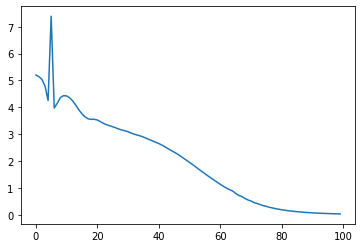

In [31]:
losses = []
for n in range(100):
  print('.', end='')
  logs = translator.train_step([example_input_batch, example_target_batch])
  losses.append(logs['batch_loss'].numpy())

print()
plt.plot(losses)

## Training the Model

### Bahdanau's Attention

In [32]:
train_translator_B = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function=True,
    att_Layer='B')

# Configure the loss and optimizer
train_translator_B.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [33]:
class BatchLogs_B(tf.keras.callbacks.Callback):
  def __init__(self, key):
    self.key = key
    self.logs = []

  def on_train_batch_end(self, n, logs):
    self.logs.append(logs[self.key])

batch_loss_B = BatchLogs_B('batch_loss')

In [34]:
train_translator_B.fit(train_dataset, epochs=100, callbacks=[batch_loss_B])

Epoch 1/100
2/2 [==============================] - 7s 244ms/step - batch_loss: 5.1957
Epoch 2/100
2/2 [==============================] - 0s 227ms/step - batch_loss: 4.8789
Epoch 3/100
2/2 [==============================] - 0s 259ms/step - batch_loss: 4.7723
Epoch 4/100
2/2 [==============================] - 0s 242ms/step - batch_loss: 4.3039
Epoch 5/100
2/2 [==============================] - 0s 189ms/step - batch_loss: 4.3734
Epoch 6/100
2/2 [==============================] - 0s 253ms/step - batch_loss: 4.1543
Epoch 7/100
2/2 [==============================] - 0s 192ms/step - batch_loss: 3.9037
Epoch 8/100
2/2 [==============================] - 0s 233ms/step - batch_loss: 3.9529
Epoch 9/100
2/2 [==============================] - 0s 256ms/step - batch_loss: 3.7764
Epoch 10/100
2/2 [==============================] - 0s 196ms/step - batch_loss: 3.6801
Epoch 11/100
2/2 [==============================] - 0s 240ms/step - batch_loss: 3.6478
Epoch 12/100
2/2 [==============================] - 

In [35]:
losses = []
for test_input_batch, test_target_batch in test_dataset:
  logs = train_translator_B._test_step([test_input_batch, test_target_batch])
  losses.append(logs['batch_loss'].numpy())
print("Test loss: ",losses)

Test loss:  [0.0064684595]


### Luong Attention

In [36]:
train_translator_L = TrainTranslator(
    embedding_dim, units,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
    use_tf_function=True,
    att_Layer='L')

# Configure the loss and optimizer
train_translator_L.compile(
    optimizer=tf.optimizers.Adam(),
    loss=MaskedLoss(),
)

In [37]:
class BatchLogs_L(tf.keras.callbacks.Callback):
  def __init__(self, key):
    self.key = key
    self.logs = []

  def on_train_batch_end(self, n, logs):
    self.logs.append(logs[self.key])

batch_loss_L = BatchLogs_L('batch_loss')

In [38]:
train_translator_L.fit(train_dataset, epochs=100, callbacks=[batch_loss_L])

Epoch 1/100
2/2 [==============================] - 7s 202ms/step - batch_loss: 5.1830
Epoch 2/100
2/2 [==============================] - 0s 176ms/step - batch_loss: 4.9079
Epoch 3/100
2/2 [==============================] - 0s 173ms/step - batch_loss: 4.5130
Epoch 4/100
2/2 [==============================] - 0s 181ms/step - batch_loss: 4.2340
Epoch 5/100
2/2 [==============================] - 0s 223ms/step - batch_loss: 4.2321
Epoch 6/100
2/2 [==============================] - 0s 181ms/step - batch_loss: 3.9830
Epoch 7/100
2/2 [==============================] - 0s 201ms/step - batch_loss: 3.9936
Epoch 8/100
2/2 [==============================] - 0s 207ms/step - batch_loss: 3.8047
Epoch 9/100
2/2 [==============================] - 0s 202ms/step - batch_loss: 3.7360
Epoch 10/100
2/2 [==============================] - 0s 167ms/step - batch_loss: 3.6657
Epoch 11/100
2/2 [==============================] - 0s 184ms/step - batch_loss: 3.6470
Epoch 12/100
2/2 [==============================] - 

In [39]:
losses = []
for test_input_batch, test_target_batch in test_dataset:
  logs = train_translator_L._test_step([test_input_batch, test_target_batch])
  losses.append(logs['batch_loss'].numpy())
print("Test loss: ",losses)

Test loss:  [0.0071423035]


# Create a Translater

## Translator

In [40]:
class Translator(tf.Module):

  def __init__(self, encoder, decoder, input_text_processor,
               output_text_processor):
    self.encoder = encoder
    self.decoder = decoder
    self.input_text_processor = input_text_processor
    self.output_text_processor = output_text_processor

    self.output_token_string_from_index = (
        tf.keras.layers.StringLookup(
            vocabulary=output_text_processor.get_vocabulary(),
            mask_token='',
            invert=True))

    # The output should never generate padding, unknown, or start.
    index_from_string = tf.keras.layers.StringLookup(
        vocabulary=output_text_processor.get_vocabulary(), mask_token='')
    token_mask_ids = index_from_string(['', '[UNK]', '[START]']).numpy()

    token_mask = np.zeros([index_from_string.vocabulary_size()], dtype=np.bool)
    token_mask[np.array(token_mask_ids)] = True
    self.token_mask = token_mask

    self.start_token = index_from_string(tf.constant('[START]'))
    self.end_token = index_from_string(tf.constant('[END]'))

  def tokens_to_text(self, result_tokens):
    shape_checker = ShapeChecker()
    shape_checker(result_tokens, ('batch', 't'))
    result_text_tokens = self.output_token_string_from_index(result_tokens)
    shape_checker(result_text_tokens, ('batch', 't'))

    result_text = tf.strings.reduce_join(result_text_tokens,
                                        axis=1, separator=' ')
    shape_checker(result_text, ('batch'))

    result_text = tf.strings.strip(result_text)
    shape_checker(result_text, ('batch',))
    return result_text

  def sample(self, logits, temperature):
    shape_checker = ShapeChecker()
    # 't' is usually 1 here.
    shape_checker(logits, ('batch', 't', 'vocab'))
    shape_checker(self.token_mask, ('vocab',))

    token_mask = self.token_mask[tf.newaxis, tf.newaxis, :]
    shape_checker(token_mask, ('batch', 't', 'vocab'), broadcast=True)

    # Set the logits for all masked tokens to -inf, so they are never chosen.
    logits = tf.where(self.token_mask, -np.inf, logits)

    if temperature == 0.0:
      new_tokens = tf.argmax(logits, axis=-1)
    else: 
      logits = tf.squeeze(logits, axis=1)
      new_tokens = tf.random.categorical(logits/temperature,
                                          num_samples=1)

    shape_checker(new_tokens, ('batch', 't'))

    return new_tokens

  def translate_unrolled(self,
                       input_text, *,
                       max_length=50,
                       return_attention=True,
                       temperature=1.0):
    batch_size = tf.shape(input_text)[0]
    input_tokens = self.input_text_processor(input_text)
    enc_output, enc_state = self.encoder(input_tokens)

    dec_state = enc_state
    new_tokens = tf.fill([batch_size, 1], self.start_token)

    result_tokens = []
    attention = []
    done = tf.zeros([batch_size, 1], dtype=tf.bool)

    for _ in range(max_length):
      dec_input = DecoderInput(new_tokens=new_tokens,
                              enc_output=enc_output,
                              mask=(input_tokens!=0))

      dec_result, dec_state = self.decoder(dec_input, state=dec_state)

      attention.append(dec_result.attention_weights)

      new_tokens = self.sample(dec_result.logits, temperature)

      # If a sequence produces an `end_token`, set it `done`
      done = done | (new_tokens == self.end_token)
      # Once a sequence is done it only produces 0-padding.
      new_tokens = tf.where(done, tf.constant(0, dtype=tf.int64), new_tokens)

      # Collect the generated tokens
      result_tokens.append(new_tokens)

      if tf.executing_eagerly() and tf.reduce_all(done):
        break

    # Convert the list of generates token ids to a list of strings.
    result_tokens = tf.concat(result_tokens, axis=-1)
    result_text = self.tokens_to_text(result_tokens)

    if return_attention:
      attention_stack = tf.concat(attention, axis=1)
      return {'text': result_text, 'attention': attention_stack}
    else:
      return {'text': result_text}

## Translator Predict Some Results

In [41]:
#Bad Attention Translator
translator_B = Translator(
    encoder=train_translator_B.encoder,
    decoder=train_translator_B.decoder,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
)

In [42]:
#Luong Attention Translator
translator_L = Translator(
    encoder=train_translator_L.encoder,
    decoder=train_translator_L.decoder,
    input_text_processor=input_text_processor,
    output_text_processor=output_text_processor,
)

In [43]:
tel1, tel2, tel3, tel4, tel5, eng1, eng2, eng3, eng4, eng5 = "","","","","","","","","",""

t1 = 'నా పేరు శ్రీనాథ్'
for test_input_batch, test_target_batch in test_dataset:
  tel1 = test_input_batch[0].numpy().decode()
  eng1 = test_target_batch[0].numpy().decode()
  tel2 = test_input_batch[1].numpy().decode()
  eng2 = test_target_batch[1].numpy().decode()
  tel3 = test_input_batch[6].numpy().decode()
  eng3 = test_target_batch[6].numpy().decode()
  tel4 = test_input_batch[8].numpy().decode()
  eng4 = test_target_batch[8].numpy().decode()
  tel5 = test_input_batch[13].numpy().decode()
  eng5 = test_target_batch[13].numpy().decode()

In [44]:
%%time
input_text = tf.constant([tel1, tel2, tel3, tel4, tel5, t1])

result_B = translator_B.translate_unrolled(
    input_text = input_text)

result_L = translator_L.translate_unrolled(
    input_text = input_text)

CPU times: user 777 ms, sys: 6.33 ms, total: 783 ms
Wall time: 778 ms


## See some translations

In [45]:
print("Original sentence: ",tel1)
print("Bahdanau Attention translator: ",result_B['text'][0].numpy().decode())
print("Luong Attention translator: ",result_L['text'][0].numpy().decode())

Original sentence:  నువ్వు ఈత కొట్టడానికో లేక చేపలు పట్టడానికో వెళ్ళొచ్చు
Bahdanau Attention translator:  you may go swimming or fishing .
Luong Attention translator:  you may go swimming or fishing .


In [46]:
print("Original sentence: ",tel2)
print("Bahdanau Attention translator: ",result_B['text'][1].numpy().decode())
print("Luong Attention translator: ",result_L['text'][1].numpy().decode())

Original sentence:  నేనింక నీతో మాట్లాడదల్చుకోవట్లేదు
Bahdanau Attention translator:  i dont want to talk to you anymore .
Luong Attention translator:  i dont accept it guy .


In [47]:
print("Original sentence: ",t1)
print("Bahdanau Attention translator: ",result_B['text'][5].numpy().decode())
print("Luong Attention translator: ",result_L['text'][5].numpy().decode())

Original sentence:  నా పేరు శ్రీనాథ్
Bahdanau Attention translator:  its thought all there there was no way this
Luong Attention translator:  there dont want to start .


## Weights Analyse

In [48]:
i=3

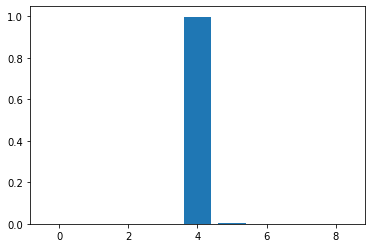

In [49]:
a_b = result_B['attention'][i]
_ = plt.bar(range(len(a_b[0, :])), a_b[0, :])

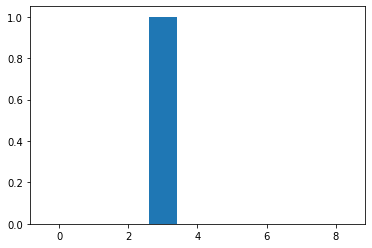

In [50]:
a_l = result_L['attention'][i]
_ = plt.bar(range(len(a_l[0, :])), a_l[0, :])

In [51]:
def plot_attention(attention, sentence, predicted_sentence):
  sentence = tf_lower_and_split_punct(sentence).numpy().decode().split()
  predicted_sentence = predicted_sentence.numpy().decode().split() + ['[END]']
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  attention = attention[:len(predicted_sentence), :len(sentence)]

  ax.matshow(attention, cmap='viridis', vmin=0.0, vmax=1)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')
  plt.suptitle('Attention weights')

నువ్వు చాలా సంతోషంగా ఉన్నట్లున్నావ్


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3098 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3134 missing from current font.
  font.set_text(s

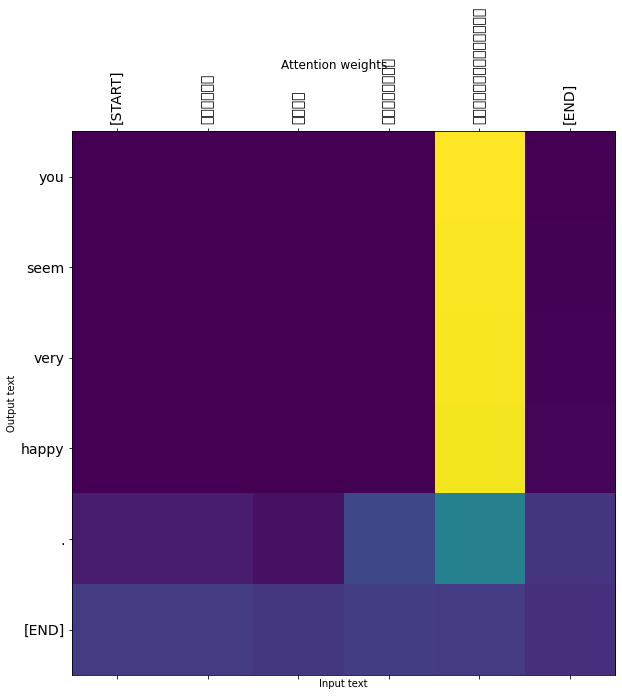

In [52]:
# Bahdanau Attention weights plot
plot_attention(result_B['attention'][i], input_text[i], result_B['text'][i])
print(input_text[i].numpy().decode())

నువ్వు చాలా సంతోషంగా ఉన్నట్లున్నావ్


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3098 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3134 missing from current font.
  font.set_text(s

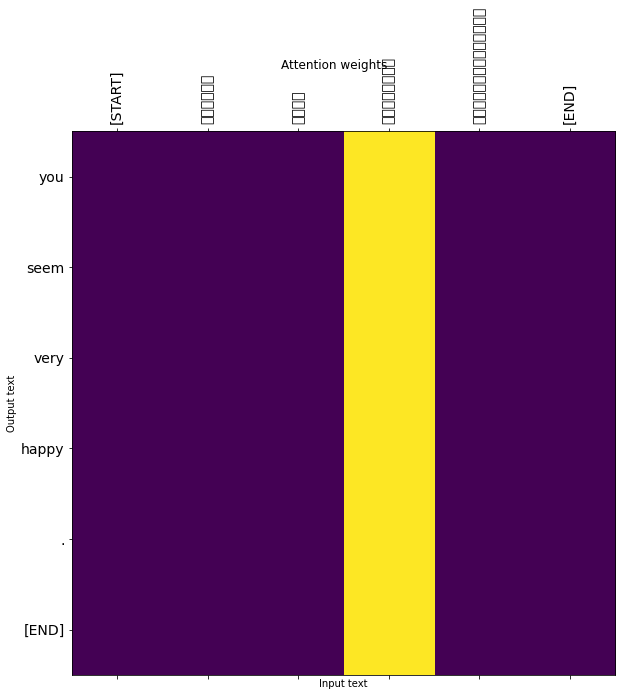

In [53]:
# Luong Attention weights plot
plot_attention(result_L['attention'][i], input_text[i], result_L['text'][i])
print(input_text[i].numpy().decode())

# Questions & Answers

Q1-)Which parts of the sentence are used as a token? Each character, each word, or are some words split up?

Ans-) Each word.

Q-2) Do the same tokens in different language have the same ID?
e.g. Would the same token index map to the German word die and to the English word die?


Ans-) No. 

As example we can see below:

*  inp = 'die hallo morgen guten tag'
*  tar = 'Someone might die because of the situation'
*  inp_voc = [0 1 2 3 4 5]
*  tar_voc = [0 1 2 3 4 5 6]

Q-3)What is the relation between the encoder output and the encoder hidden state which is used to initialize the decoder hidden state (for the architecture used in the tutorial)?

Ans-) Encoder ouput is dependent on encoder hidden state whereas vice-versa isn't the same.

Q-4) Is the decoder attending to all previous positions, including the previous decoder predictions?

Ans-) No it will attend to just the previous decoder state and predictions

Q-5) Does the encoder output change in different decoding steps?

Ans-) Yes it computes attention weights dynamically for every decoder step.

Q-6) Does the context vector change in different decoding steps?

Ans-) Yes

Q-7) The decoder uses teacher forcing. Does this mean the time steps can be computed in parallel?

Ans-) No because even the previous decoder state is also connected to the current decoder state.

Q-8) Why is a mask applied to the loss function?

Ans-) To skip the zero padded cells in the sequences.

Q-9) When translating the same sentence multiple times, do you get the same result? Why (not)? If not, what changes need to be made to get the same result each time?

Ans-) The output is not consistent.

# References



1.   https://www.tensorflow.org/text/tutorials/nmt_with_attention
2.   https://ovgu-ailab.github.io/idl2021/ass7.html

